In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import datetime 
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False

# Bitcoin data from coindesk api

In [4]:
coindesk='https://api.coindesk.com/v1/bpi/historical/close.json?'

**Start and end date**

In [5]:
start=datetime.date(2017,1,1)
end=datetime.date(2020,11,20)

In [6]:
url=f'{coindesk}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

result=requests.get(url)
result

<Response [200]>

In [7]:
type(result)

requests.models.Response

In [8]:
print(result.content)

b'{"bpi":{"2017-01-01":997.6888,"2017-01-02":1018.05,"2017-01-03":1030.8175,"2017-01-04":1129.87,"2017-01-05":1005.815,"2017-01-06":895.67,"2017-01-07":905.17,"2017-01-08":913.5238,"2017-01-09":899.35,"2017-01-10":904.7925,"2017-01-11":775.9813,"2017-01-12":802.8288,"2017-01-13":826.1213,"2017-01-14":818.6388,"2017-01-15":822.4225,"2017-01-16":830.2638,"2017-01-17":904.4538,"2017-01-18":884.2513,"2017-01-19":898.0213,"2017-01-20":891.6238,"2017-01-21":920.0113,"2017-01-22":925.3313,"2017-01-23":912.6875,"2017-01-24":885.6475,"2017-01-25":894.11,"2017-01-26":915.1,"2017-01-27":918.5625,"2017-01-28":920.28,"2017-01-29":914.0438,"2017-01-30":920.2413,"2017-01-31":967.6675,"2017-02-01":987.3463,"2017-02-02":1007.795,"2017-02-03":1018.1113,"2017-02-04":1033.6525,"2017-02-05":1013.9938,"2017-02-06":1024.6125,"2017-02-07":1052.5388,"2017-02-08":1054.3438,"2017-02-09":988.9475,"2017-02-10":993.0788,"2017-02-11":1010.0025,"2017-02-12":999.5125,"2017-02-13":996.8575,"2017-02-14":1009.2513,"2017-

**The data is of json type**

In [9]:
df=pd.read_json(result.content).iloc[:,:]
df.head()

,bpi,disclaimer,time
2017-01-01,997.6888,This data was produced from the CoinDesk Bitco...,NaN
2017-01-02,1018.0500,This data was produced from the CoinDesk Bitco...,NaN
2017-01-03,1030.8175,This data was produced from the CoinDesk Bitco...,NaN
2017-01-04,1129.8700,This data was produced from the CoinDesk Bitco...,NaN
2017-01-05,1005.8150,This data was produced from the CoinDesk Bitco...,NaN


**We take only the date and bpi field**

In [10]:
df=df.iloc[:-2,:1]
df.index.name='date'
df.index=pd.to_datetime(df.index)
df.head()

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [11]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [12]:
df.shape

(1419, 1)

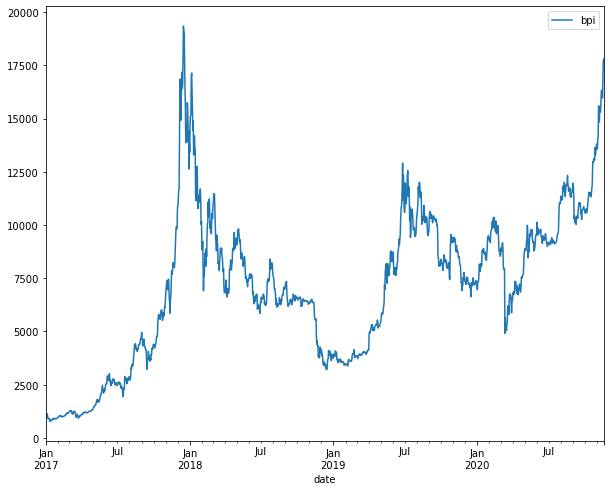

In [13]:
df.plot()

In [14]:
df.head(35)

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
2017-01-06,895.6700
2017-01-07,905.1700
2017-01-08,913.5238
2017-01-09,899.3500


**We can see that the data is daily data**

# Resampling

In [15]:
df.tail(5)

,bpi
date,
2020-11-15,15968.2450
2020-11-16,16720.6050
2020-11-17,17676.3350
2020-11-18,17785.2667
2020-11-19,17815.0783


In [16]:
df.resample('Q').mean() #It takes only the quarter data of the year by averaging

,bpi
date,
2017-03-31,1034.169242
2017-06-30,1919.658520
2017-09-30,3506.611449
2017-12-31,9413.347972
2018-03-31,10468.423818
2018-06-30,7747.165877
2018-09-30,6798.307918
2018-12-31,5169.904503
2019-03-31,3781.639959


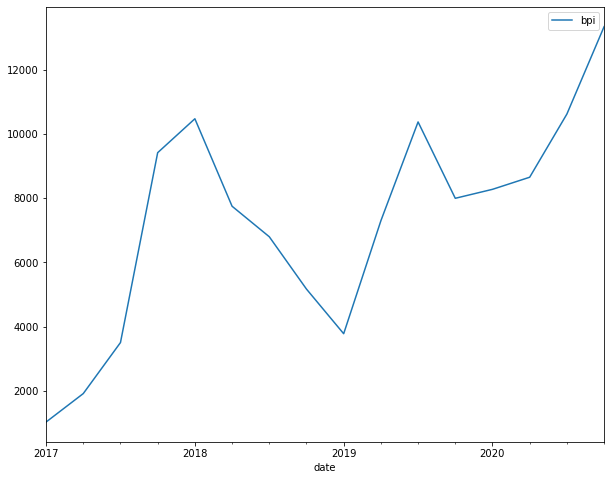

In [17]:
df.resample('Q').mean().plot()

**It captures the pattern well but leaving the small details in the pattern**

**Month resampling**

In [18]:
df.resample('M').mean()

,bpi
date,
2017-01-31,911.259258
2017-02-28,1064.382100
2017-03-31,1129.790194
2017-04-30,1218.319247
2017-05-31,1884.280513
2017-06-30,2657.555067
2017-07-31,2533.259458
2017-08-31,3914.709377
2017-09-30,4090.707313


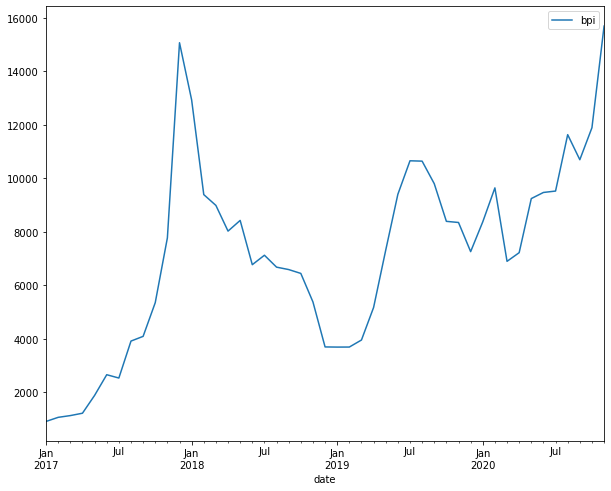

In [19]:
df.resample('M').mean().plot()

**This plot is better than the previous in capturing the small details**

**D for Calender Day B for Business Day W Weekly M Monthly Q Quarterly A Year end H for Hours T for Minutes S for secinds**

# diff() function

In [20]:
df[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [21]:
df[:5].diff()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


**It takes the difference of data from the previous data**

In [22]:
df[:5].diff(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


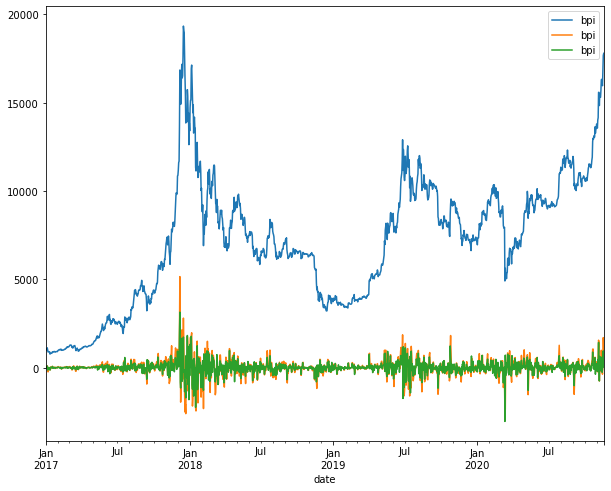

In [23]:
pd.concat([df['bpi'],df['bpi'].diff(2),df['bpi'].diff()],axis=1).plot()

**The below two plots give the stationary data, so that will be easier to model**

# shift() function

In [24]:
df[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [25]:
df[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,997.6888
2017-01-03,1018.0500
2017-01-04,1030.8175
2017-01-05,1129.8700


**It shifts the data one record down**

In [26]:
df[:5].shift(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,997.6888
2017-01-04,1018.0500
2017-01-05,1030.8175


In [27]:
df[:5].tshift(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  """Entry point for launching an IPython kernel.


,bpi
date,
2017-01-03,997.6888
2017-01-04,1018.0500
2017-01-05,1030.8175
2017-01-06,1129.8700
2017-01-07,1005.8150


In [28]:
df[:5]-df[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


**It gives the same result as diff()**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  """Entry point for launching an IPython kernel.


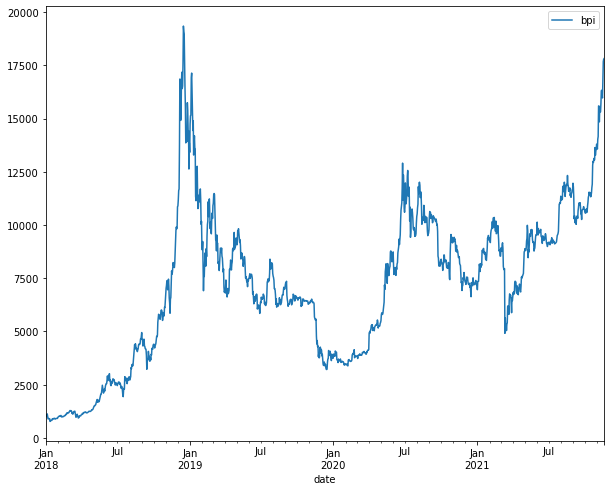

In [29]:
df.tshift(365).plot()

**It has the similar pattern to the present year data**

# rolling() method

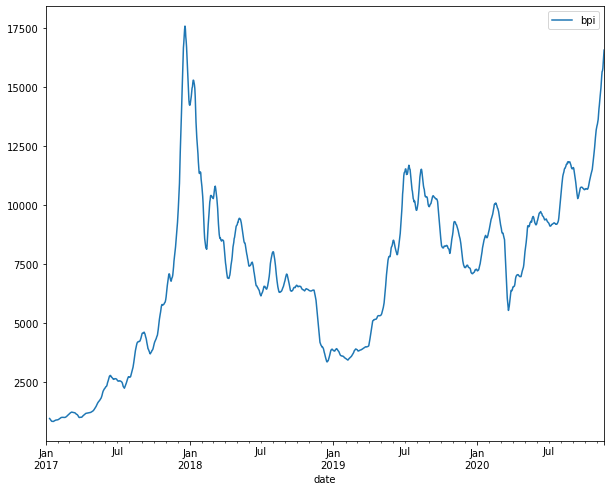

In [30]:
df.rolling(window=10).mean().plot()

In [31]:
df.resample('W').mean().rolling(window=10).mean().head(20)

,bpi
date,
2017-01-01,NaN
2017-01-08,NaN
2017-01-15,NaN
2017-01-22,NaN
2017-01-29,NaN
2017-02-05,NaN
2017-02-12,NaN
2017-02-19,NaN
2017-02-26,NaN


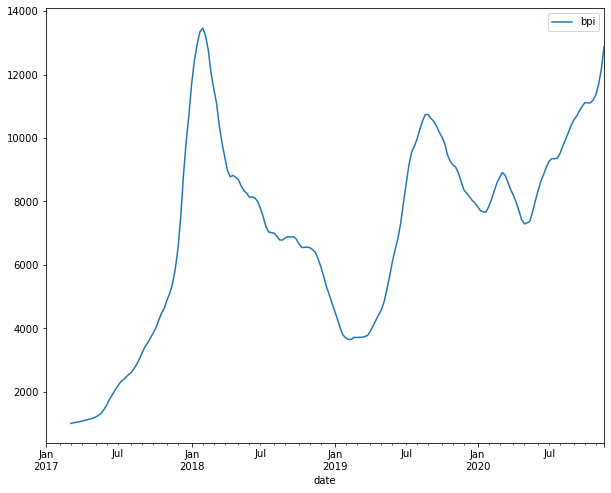

In [32]:
df.resample('W').mean().rolling(window=10).mean().plot()

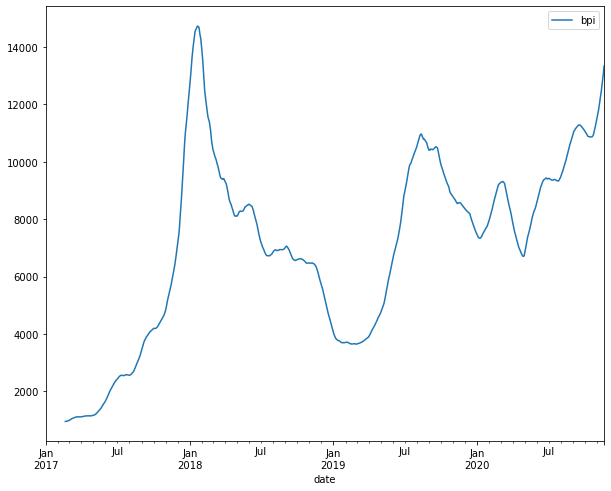

In [33]:
df.rolling(window=50).mean().plot()

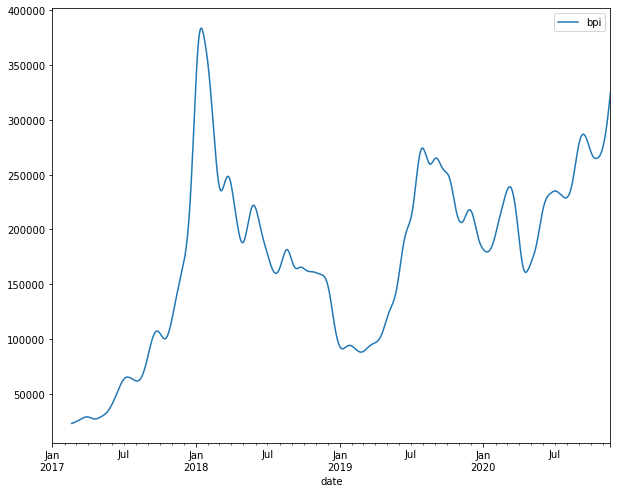

In [34]:
df.rolling(window=50,win_type='gaussian').sum(std=10).plot()

# Exponential moving average

**ewm is exponential moving average, the main purpose of ewm we give more weightage to recent values rather than historical values**

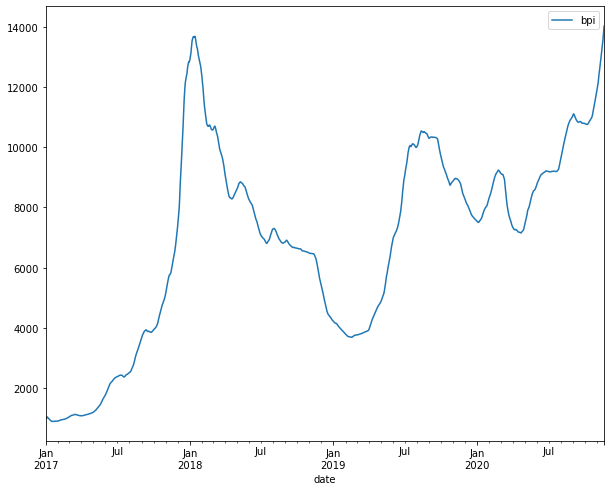

In [35]:
df.ewm(span=50).mean().plot()

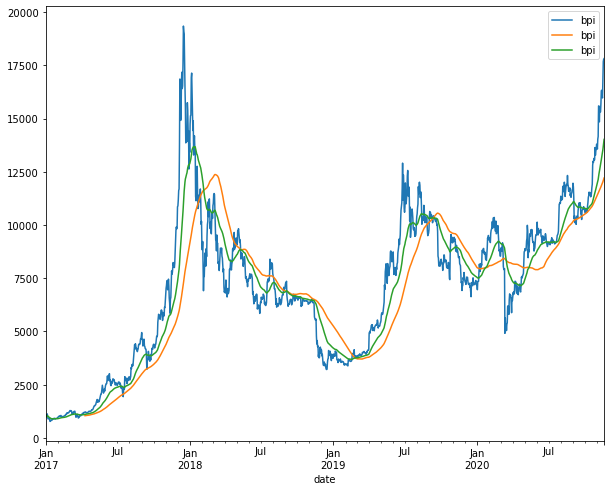

In [36]:
rolling_window_100=df.rolling(window=100).mean()
ewm_50 =df.ewm(span=50).mean()
pd.concat([df,rolling_window_100,ewm_50],axis=1).plot()

# Group by

**For to check weekend sale.
To compare different month sales**

In [37]:
df.groupby(df.index.dayofweek).mean()

,bpi
date,
0,7101.282446
1,7116.408320
2,7118.853810
3,7118.022939
4,7096.134306
5,7112.686324
6,7068.425867


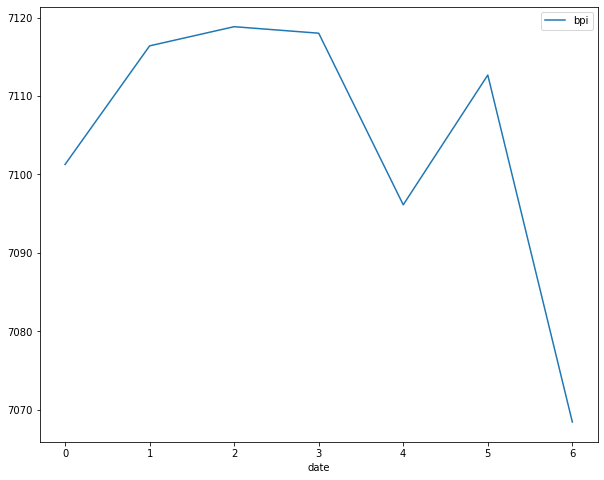

In [38]:
df.groupby(df.index.dayofweek).mean().plot()

In [39]:
df.groupby(df.index.month).mean()

,bpi
date,
1,6474.960095
2,5979.032653
3,5241.117152
4,5408.169478
5,6715.698325
6,7074.233533
7,7457.743574
8,8215.418101
9,7792.112536


In [40]:
df.groupby(df.index.days_in_month).mean()

,bpi
date,
28,4714.987062
29,9640.406090
30,7198.007610
31,7204.125646


In [41]:
df.groupby(df.index.year).mean()

,bpi
date,
2017,3990.138147
2018,7529.385702
2019,7379.960562
2020,9824.190167


# cumsum() - Cumulative sum

In [42]:
df[:5].cumsum()

,bpi
date,
2017-01-01,997.6888
2017-01-02,2015.7388
2017-01-03,3046.5563
2017-01-04,4176.4263
2017-01-05,5182.2413


# pct_change()

**percentage change to find the growth from the previous values**

In [43]:
df[:5].pct_change(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,0.033205
2017-01-04,0.109837
2017-01-05,-0.024255


# expanding()

In [44]:
df[:5].expanding().sum()

,bpi
date,
2017-01-01,997.6888
2017-01-02,2015.7388
2017-01-03,3046.5563
2017-01-04,4176.4263
2017-01-05,5182.2413


In [45]:
df[:5].expanding().mean()

,bpi
date,
2017-01-01,997.688800
2017-01-02,1007.869400
2017-01-03,1015.518767
2017-01-04,1044.106575
2017-01-05,1036.448260
